In [1]:
from scipy import signal
import matplotlib.pyplot as plt
from sympy import expand, symbols, Poly, cos
import sympy as sp
import numpy as np
import cmath

# Define variables for frequency and time domain
s = symbols('s', positive=True)
t = symbols('t', positive=True)

In [2]:
# Class to handle all transfer function related logic
class TransferFunction():
    # Constructor
    def __init__(self, num, den):
        self.num = num
        self.den = den
        self.tf = signal.TransferFunction(*self.coeffs())
        
    def __str__(self):
        return "H(s) = ({}) / ({})".format(self.num, self.den)
    
    # Get coefficients of the numerator and denominator
    def coeffs(self, param=1):
        numerator_poly = Poly(expand(self.num), s)
        denominator_poly = Poly(expand(self.den*param), s)
        return list(map(int, numerator_poly.all_coeffs())), list(map(int, denominator_poly.all_coeffs()))
    
    def bode(self):
        return self.tf.bode()
    
    def impulse_resp_time(self):
        return self.tf.impulse()
    
    def step_resp_time(self):
        return self.tf.step()
    
    # To get the step response in time for d
    def custom_step_time(self):
        temp_tf = signal.TransferFunction(*self.coeffs(param=s))
        return temp_tf.impulse()
    
    def step_resp_freq(self):
        temp_tf = signal.TransferFunction(*self.coeffs(param=s))
        return temp_tf.bode()
    
    def sine_resp_time(self, w):
        funct = self.num/self.den
        resp = funct.subs(s, w*1j)
        mag = round(sp.simplify(abs(resp)), 5)
        phase = round(sp.simplify(cmath.phase(resp)), 2)
        return mag * cos(w*t + phase)
    
    def differential(self):
        x, y = self.coeffs()
        return "ODE -> " + self._get_diff(y, 'Y(t)') + " = " + self._get_diff(x, 'X(t)')
    
    # Creates differential equation
    def _get_diff(self, coeffs, var):
        temp = []
        length = len(coeffs)
        for i in range(length):
            if coeffs[i] != 0:
                coeff = str(coeffs[i]) if coeffs[i] != 1 else ""
                deg = "D^" + str(length-i-1) if (length-i-1) != 1 else "D"
                deg = deg if (length-i-1) != 0 else ""
                temp.append(coeff + deg)
                
        return "(" + " + ".join(temp) + ")" + var

In [3]:
# Define all transfer functions
transfer_functions = {
    'A' : TransferFunction(100*s, 10+s),
    'B' : TransferFunction(2*(50+s)**2, 5*s**2),
    'C' : TransferFunction(40+80*s, 10+50*s),
    'D' : TransferFunction((20+5*s)*(20+s), s),
    'E' : TransferFunction(30*(10+s), (200+2*s)*(1000+2*s)),
    'F' : TransferFunction(100*s, (100+5*s)*(100+s)**2),
    'G' : TransferFunction(200+2*s, (50+5*s)*(1000+s)),
}

In [4]:
# Graphing functions
def bode_plot(w, mag, phase):
    plt.figure()
    plt.semilogx(w, mag)    # Bode magnitude plot
    plt.xlabel('$\omega(rad/s)$')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.figure()
    plt.semilogx(w, phase)  # Bode phase plot
    plt.xlabel('$\omega(rad/s)$')
    plt.ylabel('$Phase(\degree)$')
    plt.grid(True)
    plt.show()
    
def time_plot(x, y):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel('t(s)')
    plt.ylabel('Response')
    plt.grid(True)
    plt.show()

def sine_plot(tf, w1, w2, w3, limit=4):
    plt.figure(figsize=(15, 4))
    x_vals = np.linspace(0, limit, 1000)
    
    lam_x = sp.lambdify(t, tf.sine_resp_time(w1), modules=['numpy'])
    y_vals = lam_x(x_vals)
    plt.plot(x_vals, y_vals, label=tf.sine_resp_time(w1))
    
    lam_x = sp.lambdify(t, tf.sine_resp_time(w2), modules=['numpy'])
    y_vals = lam_x(x_vals)
    plt.plot(x_vals, y_vals, label=tf.sine_resp_time(w2))
    
    lam_x = sp.lambdify(t, tf.sine_resp_time(w3), modules=['numpy'])
    y_vals = lam_x(x_vals)
    plt.plot(x_vals, y_vals, label=tf.sine_resp_time(w3))
    
    plt.xlabel('t(s)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
# Graph all plots
def all_plots(tf):
    print(tf)
    print('Bode Plot')
    bode_plot(*tf.bode())
    print('Impulse Response')
    time_plot(*tf.impulse_resp_time())
    print('Step Response in Frequency')
    bode_plot(*tf.step_resp_freq())
    print('Step Response in Time')
    time_plot(*tf.step_resp_time())

## A

H(s) = (100*s) / (s + 10)
Bode Plot


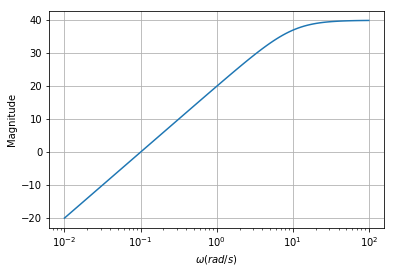

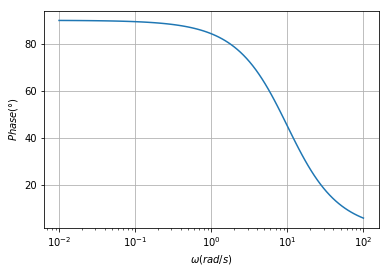

Impulse Response


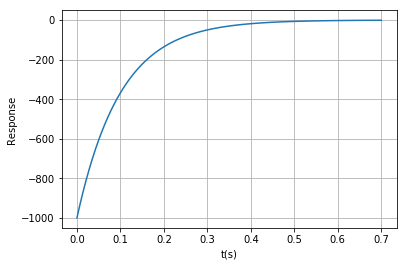

Step Response in Frequency


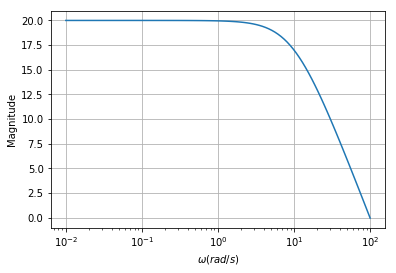

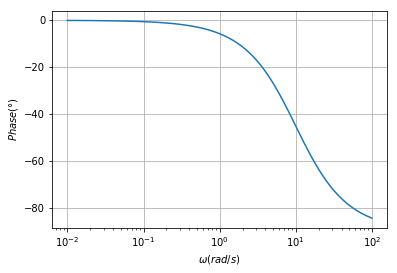

Step Response in Time


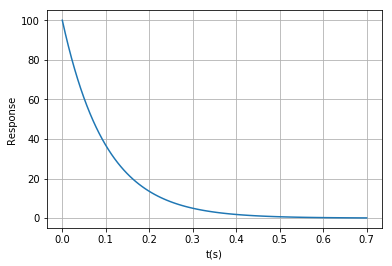

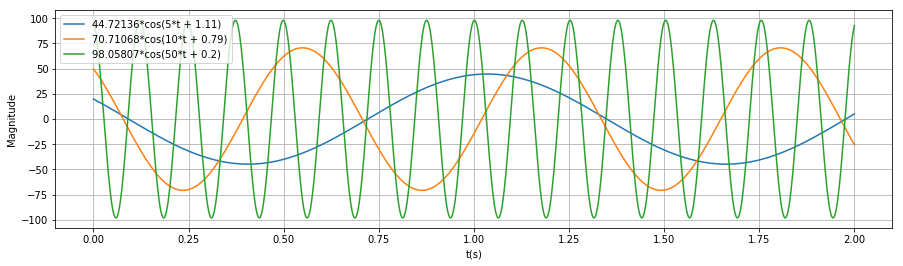

In [6]:
all_plots(transfer_functions['A'])
sine_plot(transfer_functions['A'], 5, 10, 50, 2)

## B

H(s) = (2*(s + 50)**2) / (5*s**2)
Bode Plot


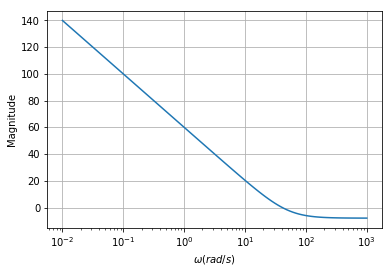

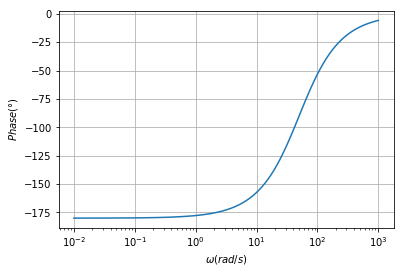

Impulse Response


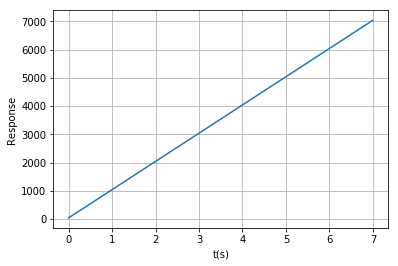

Step Response in Frequency


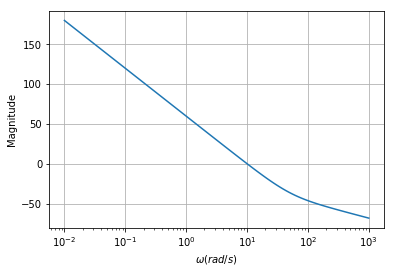

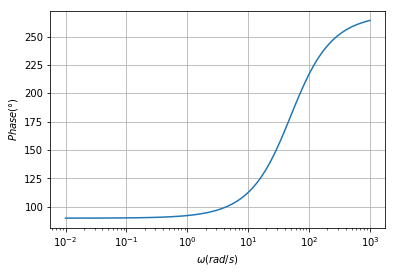

Step Response in Time


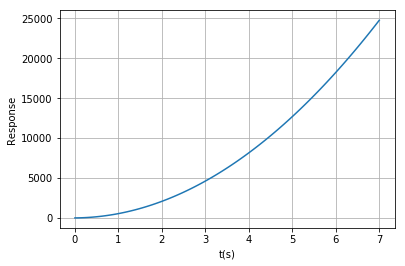

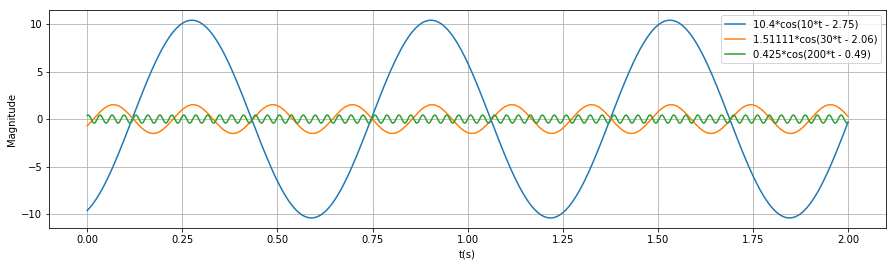

In [7]:
all_plots(transfer_functions['B'])
sine_plot(transfer_functions['B'], 10, 30, 200, 2)

## C

H(s) = (80*s + 40) / (50*s + 10)
Bode Plot


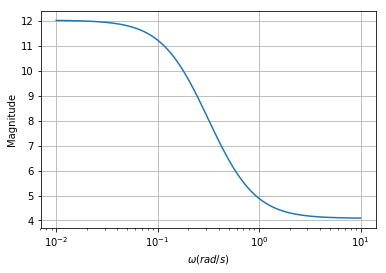

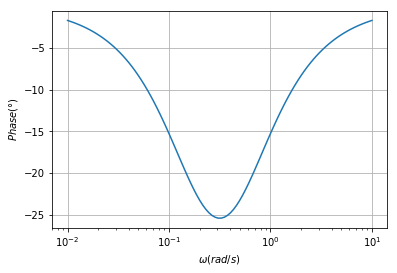

Impulse Response


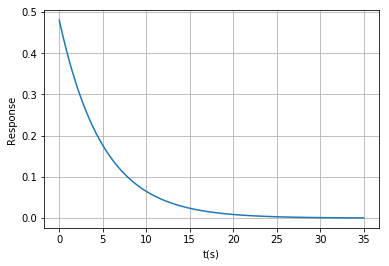

Step Response in Frequency


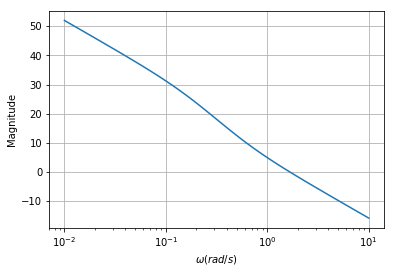

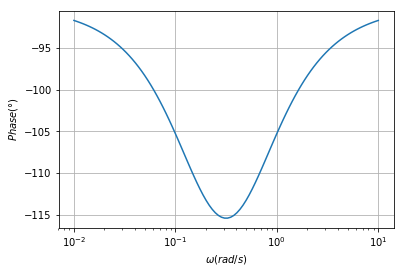

Step Response in Time


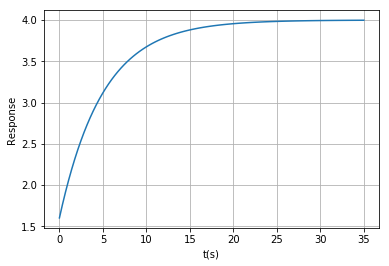

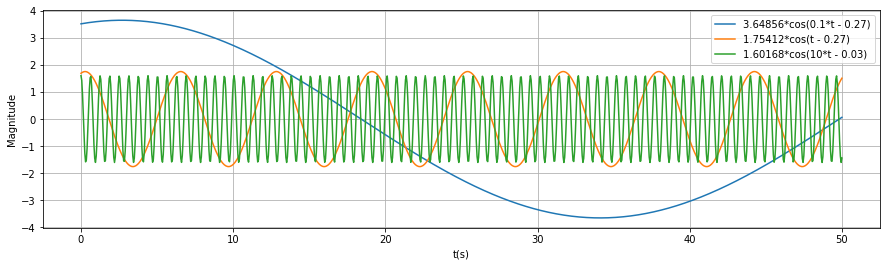

In [8]:
all_plots(transfer_functions['C'])
sine_plot(transfer_functions['C'], 0.1, 1, 10, 50)

## D

H(s) = ((s + 20)*(5*s + 20)) / (s)
Bode Plot


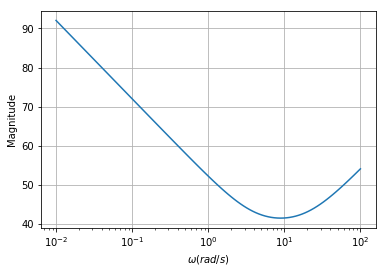

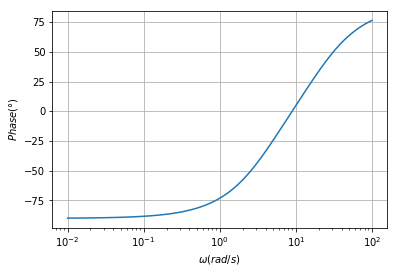

Step Response in Frequency


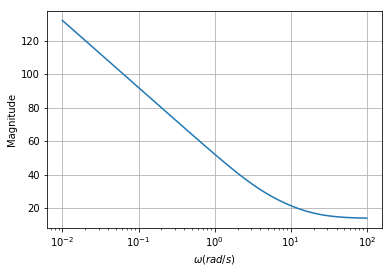

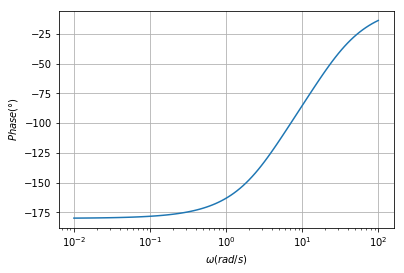

Step Response in Time


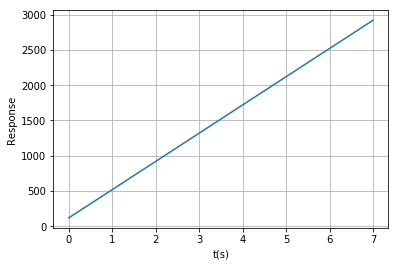

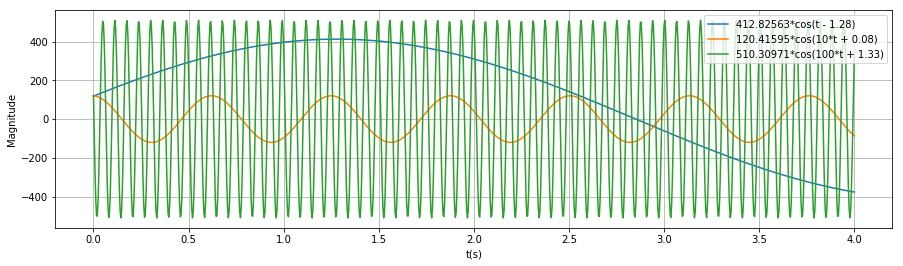

In [9]:
print(transfer_functions['D'])
print('Bode Plot')
bode_plot(*transfer_functions['D'].bode())
print('Step Response in Frequency')
bode_plot(*transfer_functions['D'].step_resp_freq())
print('Step Response in Time')
time_plot(*transfer_functions['D'].custom_step_time())
sine_plot(transfer_functions['D'], 1, 10, 100)

# The Impulse Response in the Time domain is not plotted because it contains
# the derivative of the dirac delta function.
# The derivative of the dirac delta function has a range of 
# negative infinity to infinity which makes it difficult to plot.
# Impulse response => 400 + 120*DiracDelta(t) + 5*DiracDelta'(t)

## E

H(s) = (30*s + 300) / ((2*s + 200)*(2*s + 1000))
Bode Plot


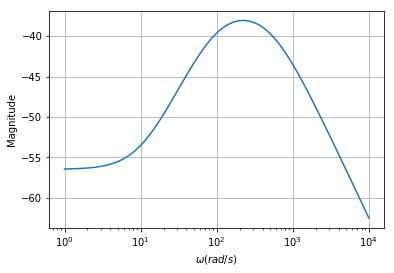

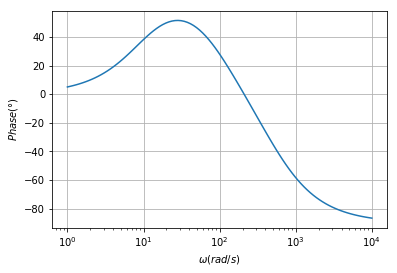

Impulse Response


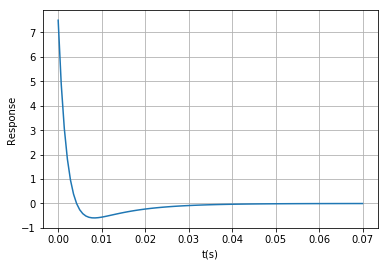

Step Response in Frequency


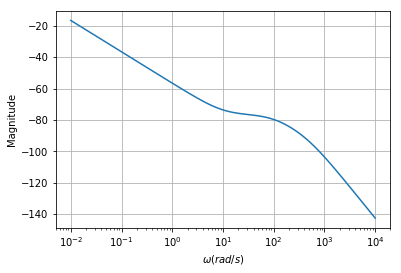

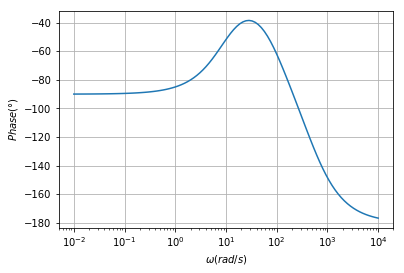

Step Response in Time


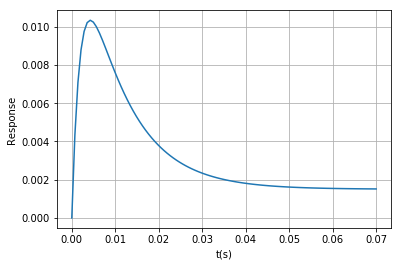

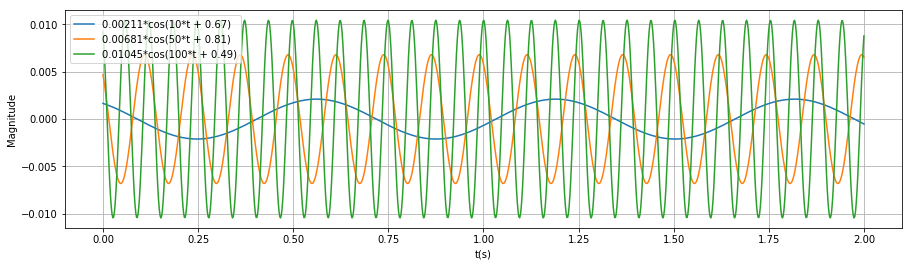

In [10]:
all_plots(transfer_functions['E'])
sine_plot(transfer_functions['E'], 10, 50, 100, 2)

## F

H(s) = (100*s) / ((s + 100)**2*(5*s + 100))
Bode Plot


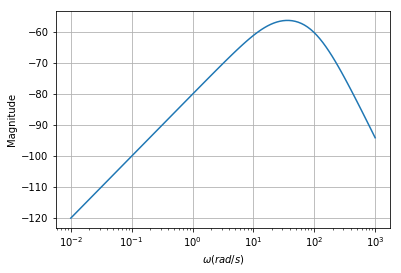

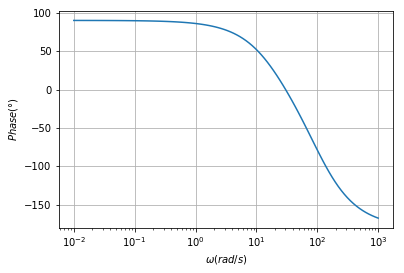

Impulse Response


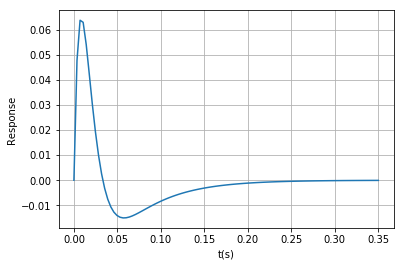

Step Response in Frequency


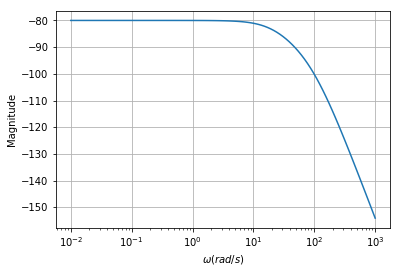

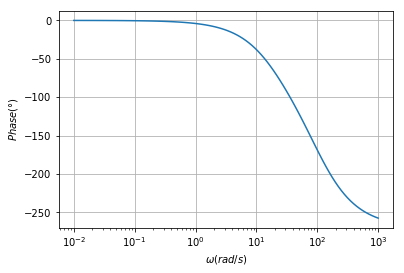

Step Response in Time


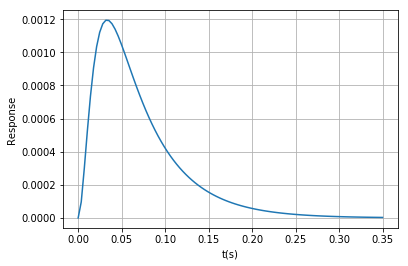

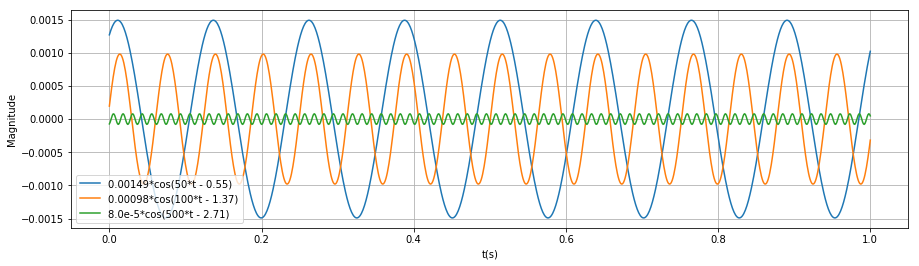

In [11]:
all_plots(transfer_functions['F'])
sine_plot(transfer_functions['F'], 50, 100, 500, 1)

## G

H(s) = (2*s + 200) / ((s + 1000)*(5*s + 50))
Bode Plot


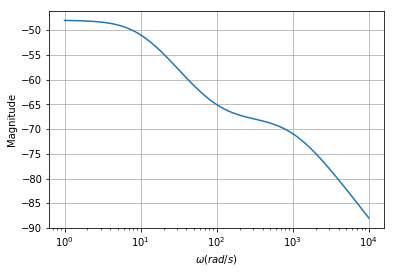

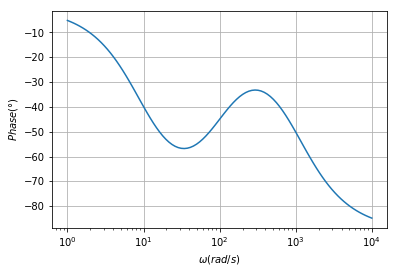

Impulse Response


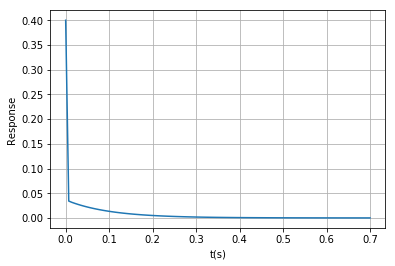

Step Response in Frequency


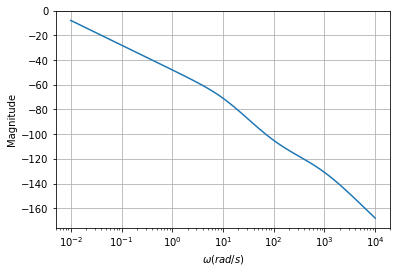

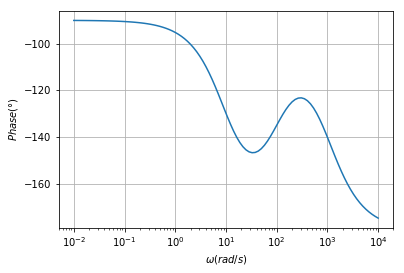

Step Response in Time


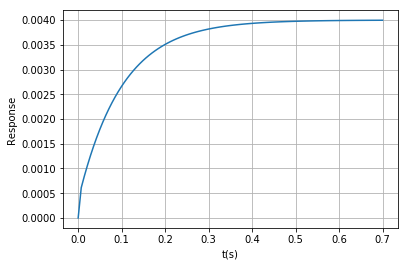

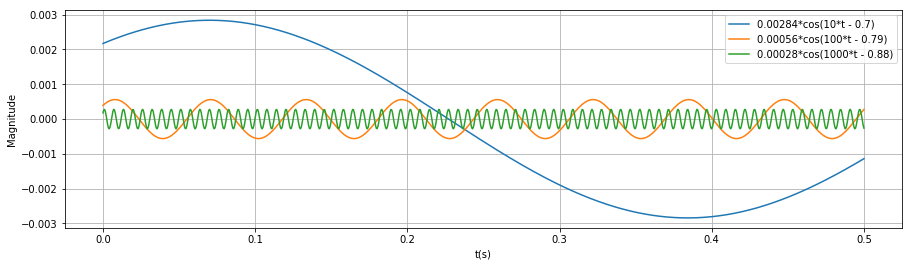

In [12]:
all_plots(transfer_functions['G'])
sine_plot(transfer_functions['G'], 10, 100, 1000, 0.5)

## Differential Equation

In [13]:
for k, v in transfer_functions.items():
    print(k)
    print(v)
    print(v.differential())
    print()

A
H(s) = (100*s) / (s + 10)
ODE -> (D + 10)Y(t) = (100D)X(t)

B
H(s) = (2*(s + 50)**2) / (5*s**2)
ODE -> (5D^2)Y(t) = (2D^2 + 200D + 5000)X(t)

C
H(s) = (80*s + 40) / (50*s + 10)
ODE -> (50D + 10)Y(t) = (80D + 40)X(t)

D
H(s) = ((s + 20)*(5*s + 20)) / (s)
ODE -> (D)Y(t) = (5D^2 + 120D + 400)X(t)

E
H(s) = (30*s + 300) / ((2*s + 200)*(2*s + 1000))
ODE -> (4D^2 + 2400D + 200000)Y(t) = (30D + 300)X(t)

F
H(s) = (100*s) / ((s + 100)**2*(5*s + 100))
ODE -> (5D^3 + 1100D^2 + 70000D + 1000000)Y(t) = (100D)X(t)

G
H(s) = (2*s + 200) / ((s + 1000)*(5*s + 50))
ODE -> (5D^2 + 5050D + 50000)Y(t) = (2D + 200)X(t)

